<a href="https://www.kaggle.com/code/abuudarda/facial-expression-detection?scriptVersionId=129394772" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **libraries**

In [1]:
from dataclasses import fields
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.models as km
from keras.layers import Dense, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.models import Sequential

# **Requied funcions for writing files**


In [2]:
def print_summary(file,model):
    with open(file,'w') as f : model.summary(print_fn= lambda x:f.write(x+'\n'))
def write_file(file,s):
    with open (file,'w') as f : f.write(s);
def write_np(file,np):
    file = open(file, "w+")
    content = str(np)
    file.write(content)
    file.close()
    

# Preprocessing input file

In [3]:

def process(dataset):
    with open(dataset) as f:
        file = f.readlines()
    lines = np.array(file)
    y = []
    x = []
    X_train=[]
    X_test=[]
    Y_train=[]
    Y_test=[]
    
    X_public=[]
    Y_public=[]
    dict = {
        '0':np.array([1., 0., 0., 0., 0., 0., 0.]),        
        '1':np.array([0., 1., 0., 0., 0., 0., 0.]),
        '2':np.array([0., 0., 1., 0., 0., 0., 0.]),
        '3':np.array([0., 0., 0., 1., 0., 0., 0.]),
        '4':np.array([0., 0., 0., 0., 1., 0., 0.]),
        '5':np.array([0., 0., 0., 0., 0., 1., 0.]),
        '6':np.array([0., 0., 0., 0., 0., 0., 1.])
    }
    for i in range(1, lines.size):
        ident, pixels, cat = lines[i].split(",")
        pixels = pixels.split()
        pixels = np.array(pixels, 'float32')
        ident = dict[ident]
        if('Training' in cat) :
            X_train.append(pixels)
            Y_train.append(ident)
        elif('PrivateTest' in cat):
            X_test.append(pixels)
            Y_test.append(ident)
        else :
            X_public.append(pixels)
            Y_public.append(ident)
#         y.append(ident)
#         x.append(pixels)

#     X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=100)

    #changing type
    X_train = np.array(X_train,'float32')
    Y_train = np.array(Y_train,'float32')
    X_test = np.array(X_test,'float32')
    Y_test = np.array(Y_test,'float32')    
    X_public = np.array(X_public,'float32')
    Y_public = np.array(Y_public,'float32')

    
    #normalizing
    X_train = X_train/255.
    X_test = X_test/255.
    X_public = X_public/255.
    #reshaping
    X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
    X_train = X_train.astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
    X_test = X_test.astype('float32')
    X_public = X_public.reshape(X_public.shape[0], 48, 48, 1)
    X_public = X_public.astype('float32')
    
    return X_train, X_test, Y_train, Y_test, X_public, Y_public

X_train, X_test, Y_train, Y_test, X_public, Y_public=process('../input/fer2013/fer2013.csv')
# print("\ny",Y_train.max())
write_np('x_test.txt',X_test)
write_np('y_test.txt',Y_test)
write_np('x_train.txt',X_train)
write_np('y_train.txt',Y_train)


In [4]:
#model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
          activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#2
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#4
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(7, activation='softmax'))

print_summary('model_summary.txt', model)
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

train = model.fit(x=X_train, y=Y_train, batch_size=32, epochs=40, validation_data=(X_test, Y_test),
                  callbacks=[ModelCheckpoint(filepath='model8.h5'), ])

Epoch 1/40
898/898 [==============================] - 18s 12ms/step - loss: 1.9456 - accuracy: 0.3200 - val_loss: 1.6073 - val_accuracy: 0.3572
Epoch 2/40
898/898 [==============================] - 10s 11ms/step - loss: 1.4670 - accuracy: 0.4298 - val_loss: 1.4475 - val_accuracy: 0.4492
Epoch 3/40
898/898 [==============================] - 10s 11ms/step - loss: 1.2957 - accuracy: 0.5043 - val_loss: 1.3717 - val_accuracy: 0.4870
Epoch 4/40
898/898 [==============================] - 10s 12ms/step - loss: 1.1824 - accuracy: 0.5490 - val_loss: 1.2415 - val_accuracy: 0.5183
Epoch 5/40
898/898 [==============================] - 10s 11ms/step - loss: 1.0986 - accuracy: 0.5858 - val_loss: 1.1651 - val_accuracy: 0.5628
Epoch 6/40
898/898 [==============================] - 10s 11ms/step - loss: 1.0341 - accuracy: 0.6128 - val_loss: 1.2381 - val_accuracy: 0.5358
Epoch 7/40
898/898 [==============================] - 10s 11ms/step - loss: 0.9150 - accuracy: 0.6545 - val_loss: 1.2101 - val_accuracy:

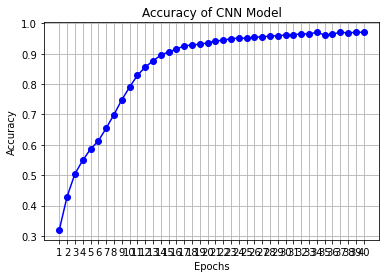

In [6]:
accuracy_values = train.history['accuracy']
epochs = range(1, len(accuracy_values) + 1)

# Plotting the accuracy values
plt.plot(epochs, accuracy_values, 'b-o')
plt.title('Accuracy of CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.show()

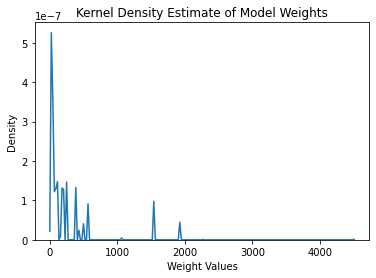

In [7]:
import seaborn as sns
weights = []
for layer in model.layers:
    layer_weights = layer.get_weights()
    for w in layer_weights:
        weights.append(w.flatten())

# Flatten the weight values
flattened_weights = np.concatenate(weights)

# Plotting the KDE plot
sns.kdeplot(flattened_weights)
plt.title('Kernel Density Estimate of Model Weights')
plt.xlabel('Weight Values')
plt.ylabel('Density')
plt.show()

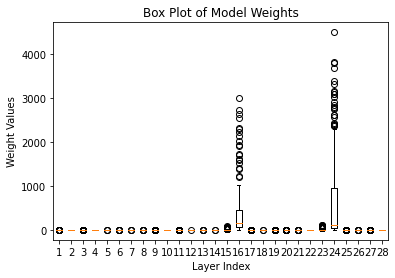

In [8]:
weights = []
for layer in model.layers:
    layer_weights = layer.get_weights()
    for w in layer_weights:
        weights.append(w.flatten())

# Create a figure and axis
fig, ax = plt.subplots()
ax.boxplot(weights)
ax.set_title('Box Plot of Model Weights')
ax.set_xlabel('Layer Index')
ax.set_ylabel('Weight Values')

# Adjust the x-axis labels to match the layer indices
layer_indices = [i+1 for i in range(len(weights))]
ax.set_xticklabels(layer_indices)

plt.show()

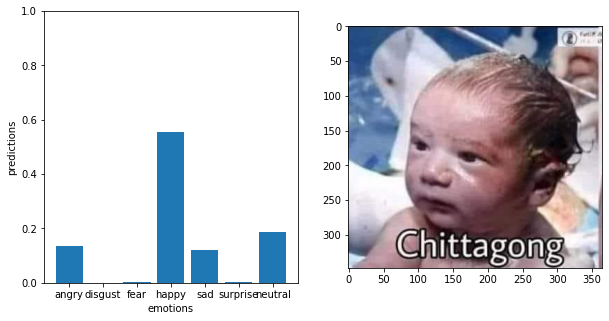

In [9]:
# img = image.load_img('input.jpg')
s='/kaggle/input/happyf/ctg.png'
original=image.load_img(s)
img = image.load_img(s, color_mode='grayscale', target_size=(48, 48))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
#normalize
x = x/255.
model = keras.models.load_model('../input/facial-expression-detection/model8.h5')
result = model.predict(x)

tick_label = ['angry', 'disgust', 'fear', 'happy',
              'sad', 'surprise', 'neutral']
left = [0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(left,result[0],tick_label=tick_label)
plt.xlabel('emotions')
plt.ylabel('predictions')
plt.ylim(top=1)
plt.subplot(1,2,2)
plt.imshow(original)


plt.show()

Training accuracy: 0.9659340381622314
Test accuracy: 0.5990526676177979
validation accuracy: 0.6124268770217896


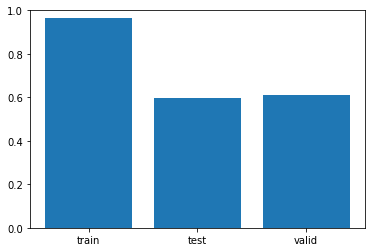

In [10]:
#Evaluation
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Training accuracy:', train_score[1])
 
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', test_score[1])

validation_score = model.evaluate(X_public, Y_public, verbose=0)
print('validation accuracy:', validation_score[1])

plt.bar(['train','test','valid'],[train_score[1], test_score[1], validation_score[1]])
plt.ylim(top=1)
plt.show()

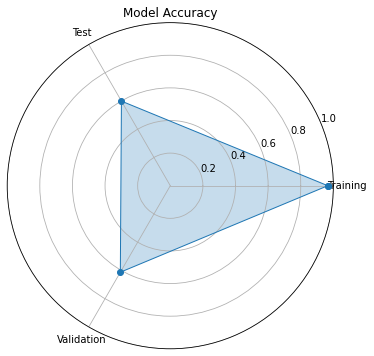

In [11]:
accuracy_labels = ['Training', 'Test', 'Validation']
accuracy_values = [train_score[1], test_score[1], validation_score[1]]

# Compute the angle at which each axis will be located on the plot
angles = np.linspace(0, 2 * np.pi, len(accuracy_labels), endpoint=False).tolist()
angles += angles[:1]  # Close the plot by appending the starting angle

# Repeat the first value to close the circle
accuracy_values += accuracy_values[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, accuracy_values, linewidth=1, linestyle='solid', marker='o')
ax.fill(angles, accuracy_values, alpha=0.25)

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(accuracy_labels)

# Set the y-axis limit to 0 and 1 for accuracy values
ax.set_ylim(0, 1)

# Set a title for the chart
ax.set_title('Model Accuracy')

# Display the chart
plt.show()